### 📦 Importing Required Libraries

We begin by importing essential Python libraries used for data manipulation, visualization, and interactive plotting:

- `numpy` and `pandas` → for data handling
- `seaborn` and `matplotlib` → for static visualizations
- `plotly` → for interactive charts

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly as pt

### 📥 **Loading the Bank Customer Churn Dataset**

We now load the dataset using **pandas**.  
Make sure the file path is correct, especially if you're running this on a local system.

> 📌 **Note:** If you're using a relative path or deploying this, update the path accordingly.


In [2]:
df = pd.read_csv(r"C:\Users\adity\Downloads\College stuff\Group-02 Main project\Bank Customer Churn Prediction.csv")
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### 📐 **Checking the Shape of the Dataset**

We use the `.shape` attribute to understand the **dimensions** of the dataset:  
- **Number of rows** (customer records)  
- **Number of columns** (features)

In [3]:
df.shape

(10000, 12)

### 🧾 **Dataset Info Summary – Data Types & Non-Nulls**

The `.info()` method provides a concise summary of the DataFrame, including:

- **Total entries**
- **Column names**
- **Data types**
- **Non-null counts**

This helps identify:
- Which columns are **numerical vs categorical**
- If there are any **missing values**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### 📊 **Statistical Summary of Numerical Features**

The `.describe()` function generates **summary statistics** of all numerical columns, including:

- **Count** – number of non-null values  
- **Mean** – average value  
- **Std** – standard deviation  
- **Min / Max** – range of values  
- **25%, 50%, 75%** – quartiles (used in outlier detection)

This helps us understand the **spread and distribution** of the numeric data.

In [5]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### 🧼 **Checking for Missing Values (Nulls)**

We check if the dataset contains any **missing (NaN)** values using:

In [6]:
df.isna().sum().sum()

np.int64(0)

### 📋 **Checking for Duplicate Records**

We check for **duplicate rows** in the dataset using:

In [7]:
df.duplicated().sum()

np.int64(0)

### 📦 **Visualizing Outliers Using Boxplots**

We use **boxplots** to visually inspect the **distribution and potential outliers** in each numerical feature.

This loop does the following:
- Iterates over all columns in the dataset
- Skips **categorical (object)** columns
- Plots a **boxplot** for each numeric column
- Helps detect outliers using **IQR method visually**

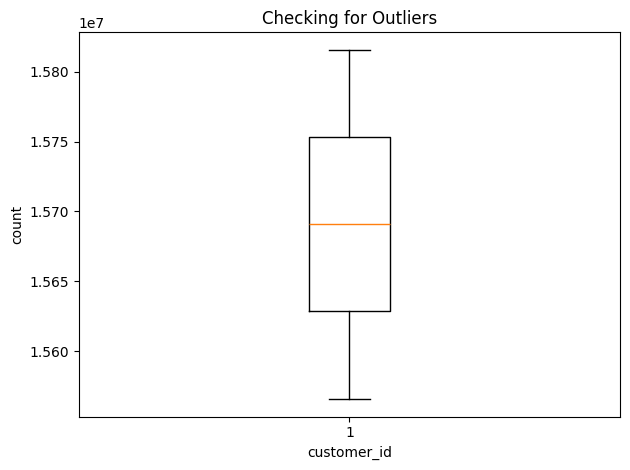

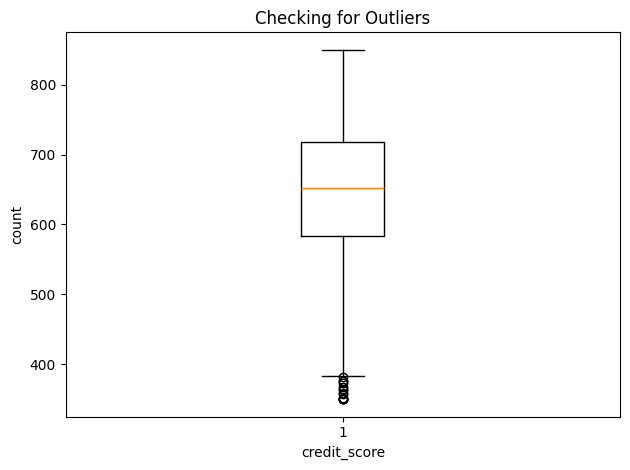

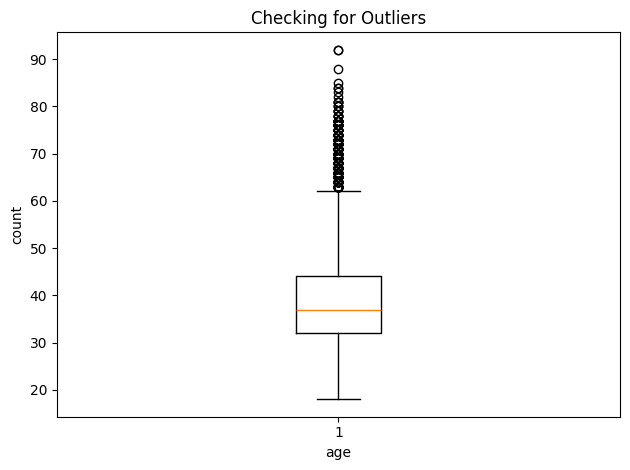

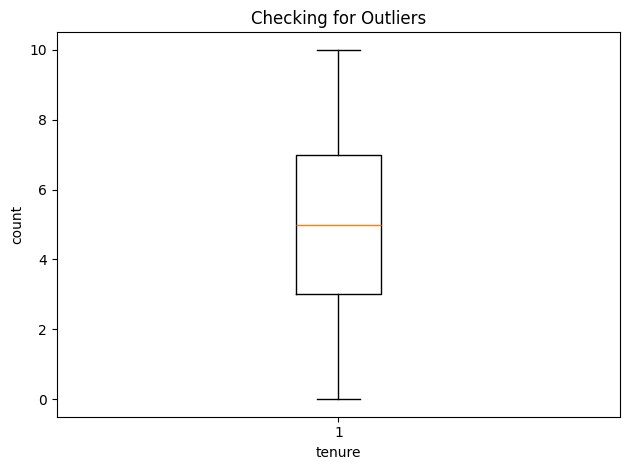

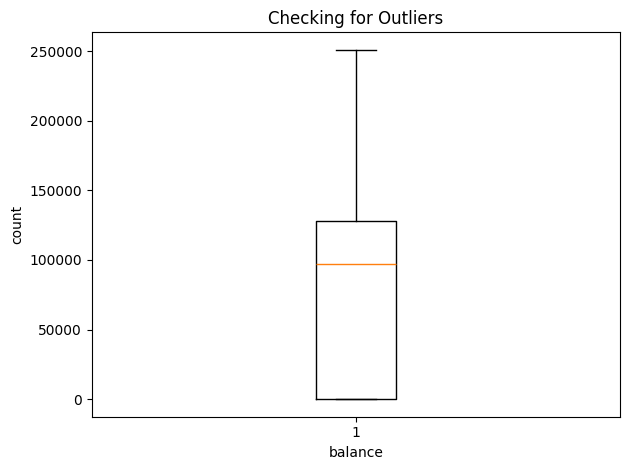

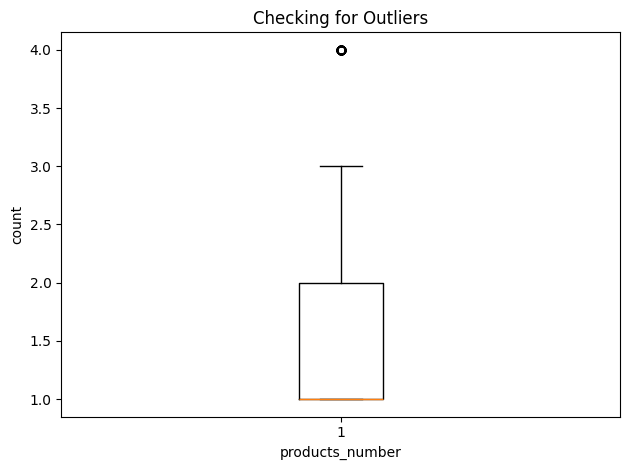

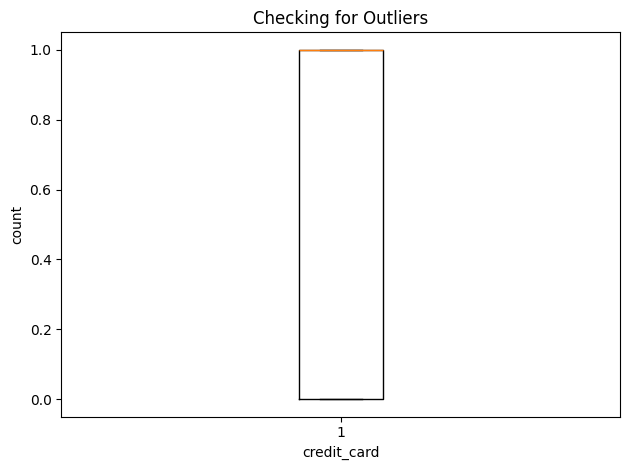

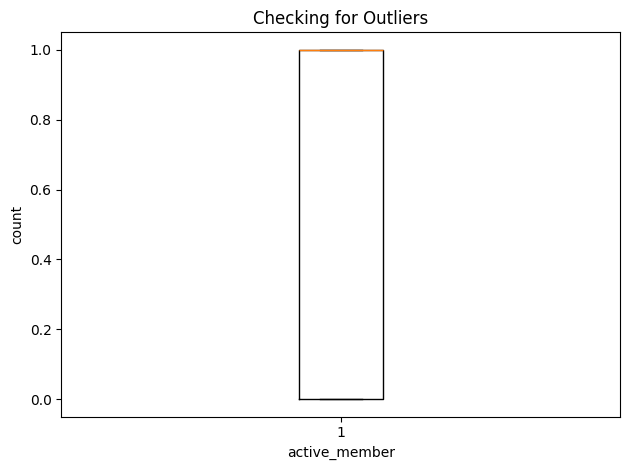

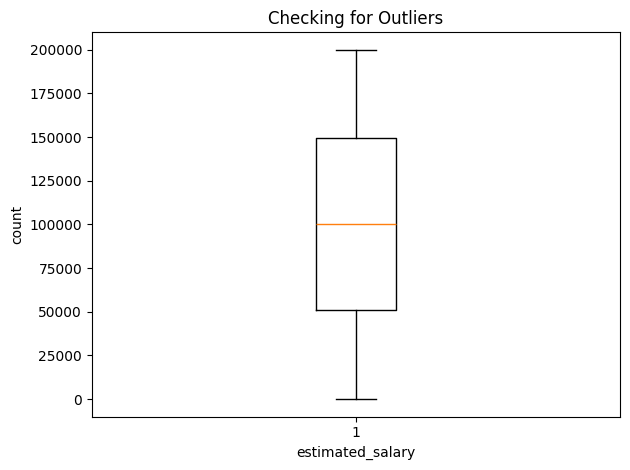

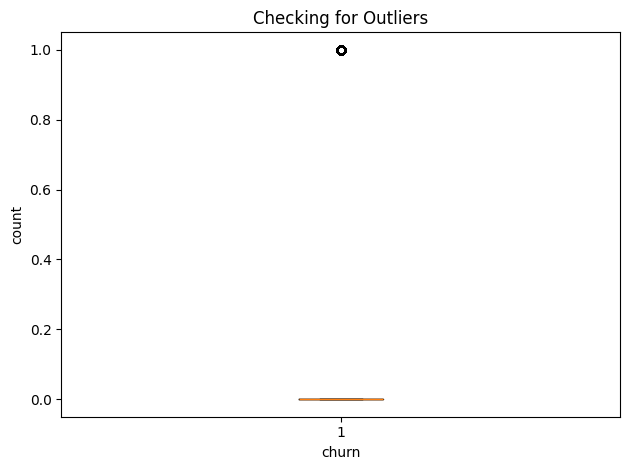

In [8]:
for x in df.columns:
    if df[x].dtypes == 'object':
        continue
    plt.boxplot(df[x])
    plt.title("Checking for Outliers")
    plt.xlabel(x)
    plt.ylabel('count')
    plt.tight_layout()
    plt.show()

### ✂️ **Removing Outliers Using IQR Method – `age` Column**

We apply the **Interquartile Range (IQR)** technique to detect and remove outliers from the `age` column.

#### 🔍 Steps:
1. Calculate **Q1 (25th percentile)** and **Q3 (75th percentile)**
2. Compute the **IQR = Q3 - Q1**
3. Define **lower** and **upper bounds** using the standard 1.5 × IQR rule
4. Filter the DataFrame to keep only the rows **within these bounds**

In [9]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR  
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

### ✂️ **Outlier Removal in `credit_score` Using Custom IQR Range**

We remove outliers in the `credit_score` column using a **custom IQR-based approach**:

#### 🔍 Steps:
- Compute Q1 and Q3 for the column  
- Calculate **IQR = Q3 - Q1**  
- Set bounds:
  - **Lower bound**: `Q1 - 1.5 × IQR`
  - **Upper bound**: `Q3 + 3.5 × IQR` ← *(more lenient upper range)*

In [10]:
Q1 = df.credit_score.quantile(0.25)
Q3 = df.credit_score.quantile(0.75)
IQR = Q3 - Q1 
lower_bound = Q1 - 1.5*IQR 
upper_bound = Q3 + 3.5*IQR 
df = df[(df.credit_score >= lower_bound) & (df.credit_score <= upper_bound)]

### 📦 **Boxplot for `Age` After Outlier Removal**

We re-plot the boxplot for the `age` column to **verify that outliers have been successfully removed**.

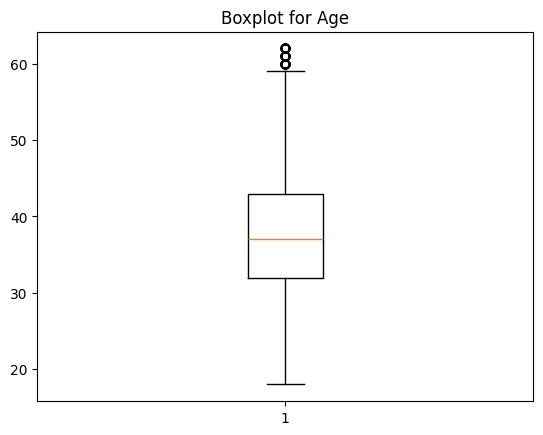

In [11]:
plt.boxplot(df['age'])
plt.title("Boxplot for Age")
plt.show()

### 📦 **Boxplot for `credit_score` After Outlier Removal**

We visualize the `credit_score` column again using a boxplot to **confirm outlier handling** using the custom IQR bounds.

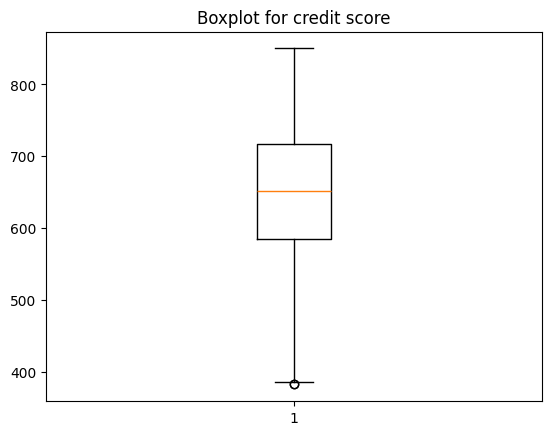

In [12]:
plt.boxplot(df['credit_score'])
plt.title("Boxplot for credit score")
plt.show()

### ⚖️ **Class Distribution of the Target Variable – `churn`**

We use a **countplot** to visualize the distribution of the target variable `churn`.  
This helps identify **class imbalance**, which is crucial for choosing appropriate models and evaluation metrics.

Text(0.5, 1.0, 'Churn Distribution')

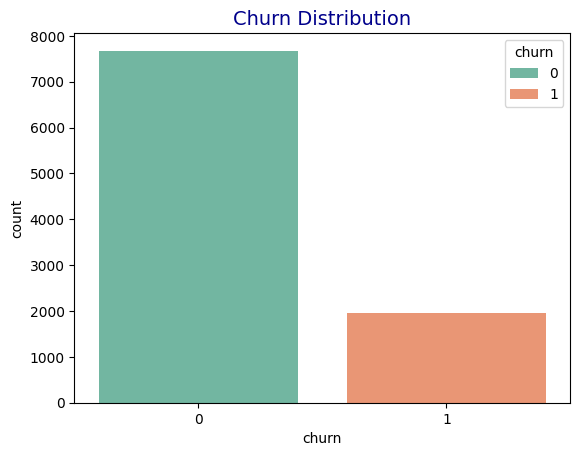

In [13]:
# Class Distribution 
sns.countplot(x='churn', data=df, palette='Set2', hue='churn')
plt.title("Churn Distribution", fontsize=14, color='darkblue') 

### 👥 **Churn Rate by Gender**

This plot helps us understand how churn varies across **different genders**.  
We use a **barplot** to compare the **average churn rate** for each gender category.

Text(0.5, 1.0, 'Churn Rate by Gender')

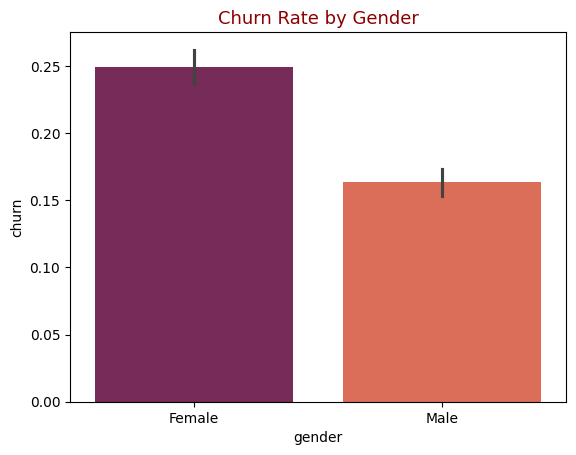

In [14]:
# Churn Rate by Gender / Geography 
sns.barplot(x='gender', y='churn', data=df, palette='rocket', hue='gender')
plt.title("Churn Rate by Gender", fontsize=13, color='darkred')

### 💰 **Boxplot: Account Balance vs Churn**

This boxplot shows the distribution of **account balances** grouped by `churn` status.

- Helps identify whether customers with **very high** or **very low balances** are more likely to churn.
- Useful for **financial behavior analysis** in churn prediction.

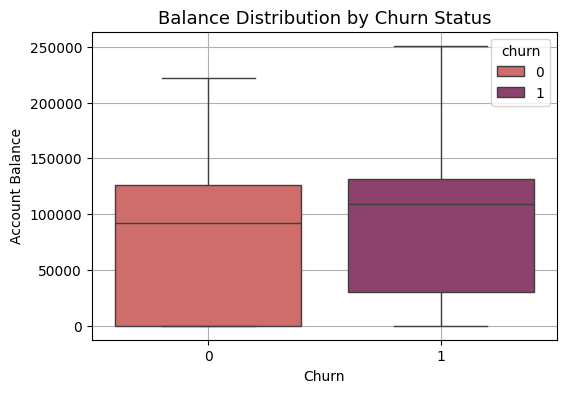

In [15]:
# Boxplot: Balance / Salary / Tenure vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x='churn', y='balance', data=df, palette='flare', hue='churn')
plt.title("Balance Distribution by Churn Status", fontsize=13)
plt.xlabel("Churn")
plt.ylabel("Account Balance")
plt.grid(True)
plt.show()

### 🔥 **Correlation Heatmap of Numerical Features**

We generate a **correlation matrix** using `.corr()` to examine the **pairwise relationships** between all **numerical columns**.

This helps us:
- Detect **multicollinearity**
- Identify strong **positive/negative** correlations
- Choose which features to **keep or drop**

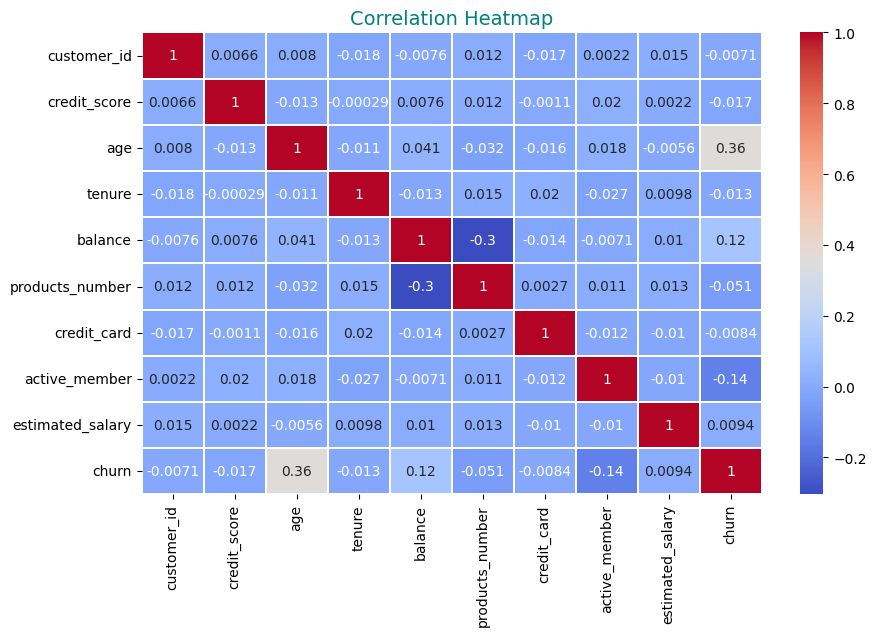

In [16]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include='number')  # only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.3)
plt.title("Correlation Heatmap", fontsize=14, color='teal')
plt.show()

### 📈 **Age Distribution by Churn (Histogram + KDE)**

We use `sns.histplot()` with a KDE (Kernel Density Estimate) to visualize the **distribution of customer age**, split by churn status.

- The `hue='churn'` shows **how age affects churn probability**
- The KDE line adds smoothness to understand the **trend shape**

Text(0.5, 1.0, 'Age Distribution by Churn')

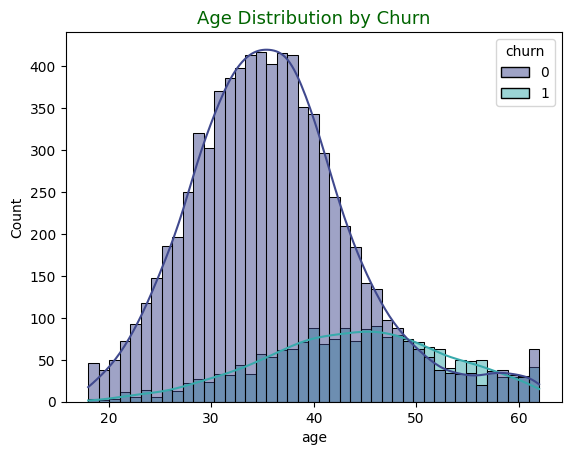

In [17]:
# Histplot of Age, Balance, Tenure 
sns.histplot(data=df, x='age', hue='churn', kde=True, palette='mako')
plt.title("Age Distribution by Churn", fontsize=13, color='darkgreen')

### 🟢 **Churn Rate by Active Membership**

This barplot compares the **churn rate** between active and inactive customers.

- `active_member = 1` means the customer is actively engaged with the bank
- Lower churn among active members may signal higher satisfaction or retention

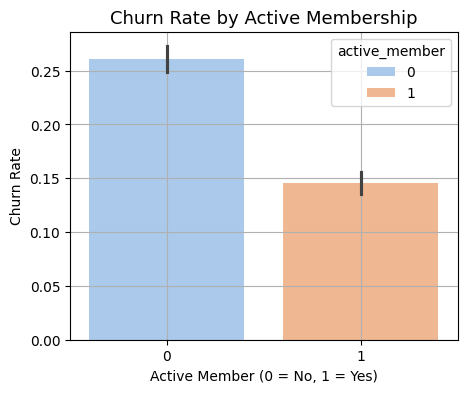

In [18]:
# Churn vs Active Member
plt.figure(figsize=(5,4))
sns.barplot(x='active_member', y='churn', data=df, palette='pastel', hue='active_member')
plt.title("Churn Rate by Active Membership", fontsize=13)
plt.xlabel("Active Member (0 = No, 1 = Yes)")
plt.ylabel("Churn Rate")
plt.grid(True)
plt.show()

### 💳 **Churn Rate by Credit Card Ownership**

We analyze whether **having a credit card** affects the likelihood of customer churn.

- `credit_card = 1` → Customer has a card  
- `credit_card = 0` → Customer does not have a card

This barplot shows the **average churn rate** for each group.

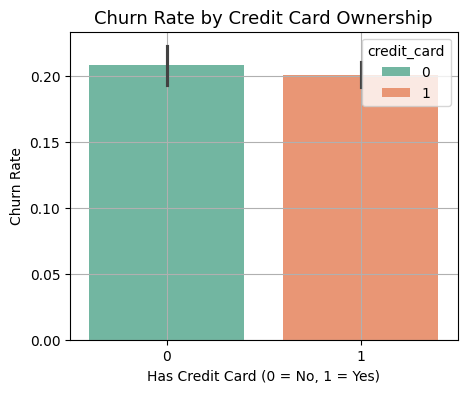

In [19]:
plt.figure(figsize=(5,4))
sns.barplot(x='credit_card', y='churn', data=df, palette='Set2', hue='credit_card')
plt.title("Churn Rate by Credit Card Ownership", fontsize=13)
plt.xlabel("Has Credit Card (0 = No, 1 = Yes)")
plt.ylabel("Churn Rate")
plt.grid(True)
plt.show()

### 🔁 **Label Encoding of Categorical Variables**

We convert **categorical columns** (`object` dtype) into **numerical format** using `LabelEncoder`, which assigns a unique integer to each category.

This is essential before feeding the data into machine learning models, which can't handle string types directly.

In [20]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
for col in ['country', 'gender']:
    df[col] = le.fit_transform(df[col])

### 🎯 **Separating Features and Target Variable**

We now define our **independent variables (`X`)** and **dependent variable (`y`)** for model training.

- `X` → All input features (excluding the target)
- `y` → Target column (`churn`) which we want to predict

In [22]:
x = df.drop('churn', axis=1)
y = df['churn']

### ✂️ **Splitting the Data into Training and Testing Sets**

We split the dataset into:
- **Training set (80%)** → for model learning
- **Testing set (20%)** → for evaluation on unseen data

We also set `random_state=42` for **reproducibility**.

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

### 🧠 **Training a Logistic Regression Model**

We build a **Logistic Regression** model to classify customers as churned or not.

#### 🔧 Parameters:
- `max_iter=1000` → Increases the number of iterations to ensure convergence  
- `class_weight='balanced'` → Adjusts weights inversely proportional to class frequencies, useful for **imbalanced data**

In [24]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### 📤 **Making Predictions on the Test Set**

We use the trained Logistic Regression model to predict churn outcomes on the **test set**.

In [25]:
y_pred_lr = lr.predict(x_test) 

### 🎯 **Evaluating Logistic Regression – Accuracy Score**

We calculate the **accuracy score** of the model, which tells us the percentage of correct predictions made on the test set.

In [26]:
from sklearn.metrics import * 
acc_lr = accuracy_score(y_test, y_pred_lr)*100
acc_lr

71.96261682242991

### 📋 **Classification Report – Precision, Recall, F1-Score**

We generate a detailed performance report that includes:

- **Precision** → Out of predicted positives, how many were actual positives  
- **Recall** → Out of actual positives, how many were correctly predicted  
- **F1-score** → Harmonic mean of precision and recall  
- **Support** → Number of actual samples in each class

In [27]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1514
           1       0.41      0.67      0.50       412

    accuracy                           0.72      1926
   macro avg       0.65      0.70      0.65      1926
weighted avg       0.79      0.72      0.74      1926



### 📈 **AUC Score – Logistic Regression**

The **AUC (Area Under the ROC Curve)** represents the model’s ability to **distinguish between churned and retained customers**.

- AUC ranges from `0.0` (worst) to `1.0` (perfect)
- Higher AUC = Better class separation

In [28]:
auc_lr = roc_auc_score(y_test, y_pred_lr)*100
auc_lr

70.06467148042222

### 🌳 **Training a Decision Tree Classifier**

We now build a **Decision Tree** classifier, a simple yet powerful model that splits the data into rules based on feature thresholds.

In [29]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 📤 **Making Predictions with Decision Tree**

We use the trained Decision Tree model to predict churn outcomes on the **test set**.

In [30]:
y_pred_dt = dt.predict(x_test)

### 🎯 **Decision Tree Accuracy Score**

We compute the **accuracy** of the Decision Tree classifier on the test set — i.e., the percentage of correct churn predictions.

In [31]:
acc_dt = accuracy_score(y_test, y_pred_dt)*100
acc_dt

78.71235721703012

### 📋 **Decision Tree – Classification Report**

We evaluate the performance of the Decision Tree model using precision, recall, and F1-score for both churned and non-churned customers.

In [32]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1514
           1       0.50      0.48      0.49       412

    accuracy                           0.79      1926
   macro avg       0.68      0.67      0.68      1926
weighted avg       0.78      0.79      0.79      1926



### 📈 **AUC Score – Decision Tree**

We compute the **AUC (Area Under the ROC Curve)** to measure the model's ability to distinguish between churned and retained customers.

In [33]:
auc_dt = roc_auc_score(y_test, y_pred_dt)*100
auc_dt

67.46787267060832

### 🧪 **Tuning Decision Tree – Finding Optimal `max_depth`**

We loop through different values of `max_depth` to evaluate how it affects model performance.

- Helps prevent **overfitting** (depth too high) or **underfitting** (depth too shallow)
- We choose the depth that gives the **best accuracy** on the test set

In [34]:
# Finding out max depth
depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for i in depth:
    temp_model_dt = DecisionTreeClassifier(max_depth=i)
    temp_model_dt.fit(x_train,y_train)
    temp_model_pred_dt = temp_model_dt.predict(x_test)
    temp_acc_dt = accuracy_score(temp_model_pred_dt, y_test)
    print(f"For the max depth {i} the accracy is: {temp_acc_dt}") 

For the max depth 1 the accracy is: 0.7860851505711319
For the max depth 2 the accracy is: 0.8110072689511942
For the max depth 3 the accracy is: 0.8260643821391485
For the max depth 4 the accracy is: 0.8442367601246106
For the max depth 5 the accracy is: 0.8406022845275182
For the max depth 6 the accracy is: 0.8416407061266874
For the max depth 7 the accracy is: 0.8473520249221184
For the max depth 8 the accracy is: 0.8489096573208723
For the max depth 9 the accracy is: 0.8452751817237798
For the max depth 10 the accracy is: 0.8317757009345794
For the max depth 11 the accracy is: 0.8328141225337488
For the max depth 12 the accracy is: 0.8229491173416407
For the max depth 13 the accracy is: 0.8219106957424714
For the max depth 14 the accracy is: 0.8172377985462098
For the max depth 15 the accracy is: 0.7985462097611631


### 🌲 **Final Decision Tree (CART) Model**

We finalize the Decision Tree model using the optimal `max_depth` based on earlier tuning.

> ⚙️ Note: `sklearn.tree.DecisionTreeClassifier` uses the **CART algorithm** (Classification and Regression Trees) by default with **Gini Impurity** for splitting.

In [35]:
# Using Decission Tree CART
final_model_dt = DecisionTreeClassifier(max_depth=8, random_state=45)
final_model_dt

,criterion,'gini'
,splitter,'best'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,45
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 🏗️ **Fitting the Final Decision Tree (CART)**

We now train the final Decision Tree model with the **optimal max depth** using the CART algorithm.

In [36]:
final_model_dt.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,45
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 📤 **Making Predictions with Final CART Model**

We use the trained final Decision Tree (CART) model to predict churn on the **test set**.

In [37]:
final_model_pred_dt = final_model_dt.predict(x_test)

### 🎯 **Final Accuracy – Tuned Decision Tree (CART)**

We calculate the final **accuracy score** of the Decision Tree model using the test set.

In [38]:
final_model_acc_dt = accuracy_score(final_model_pred_dt, y_test)*100 
final_model_acc_dt

84.83904465212876

### 📋 **Classification Report – Final CART Model**

We generate a detailed evaluation of the final **Decision Tree (CART)** model using precision, recall, F1-score, and support.

In [39]:
print(classification_report(final_model_pred_dt, y_test))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1694
           1       0.43      0.76      0.55       232

    accuracy                           0.85      1926
   macro avg       0.70      0.81      0.73      1926
weighted avg       0.90      0.85      0.87      1926



### 📈 **AUC Score – Final CART Model**

We compute the **AUC (Area Under the ROC Curve)** for the final Decision Tree model.

In [40]:
final_model_auc_dt = roc_auc_score(final_model_pred_dt, y_test)*100
final_model_auc_dt

80.96527297154256

### 🌳 **Decision Tree – C4.5 Style (Using Entropy Criterion)**

We simulate the **C4.5 decision tree** using `DecisionTreeClassifier` with the following parameters:

- `criterion='entropy'` → Uses **information gain**, similar to C4.5  
- `max_depth=8` → Tuned depth based on earlier performance  
- `random_state=45` → Ensures reproducibility

In [ ]:
# Using Decission Tree - C4.5
dt_c45 = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=45)
dt_c45.fit(x_train, y_train)

# Predictions
y_pred_c45 = dt_c45.predict(x_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_c45)*100)
print("AUC:", roc_auc_score(y_test, y_pred_c45)*100)
print("Classification Report:\n", classification_report(y_test, y_pred_c45))

Accuracy: 85.202492211838
AUC: 69.82932757050698
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      1514
           1       0.78      0.43      0.55       412

    accuracy                           0.85      1926
   macro avg       0.82      0.70      0.73      1926
weighted avg       0.84      0.85      0.83      1926



### ⚡ **Simulating Decision Tree – C5.0 with XGBoost**

We use **XGBoost (Extreme Gradient Boosting)** to simulate the behavior of the **C5.0 algorithm**, which is the boosted successor to C4.5.

#### ⚙️ Parameters used:
- `use_label_encoder=False` → Avoids legacy warnings  
- `eval_metric='logloss'` → Suitable for binary classification  
- `random_state=45` → Ensures reproducibility

In [ ]:
# Using Decission Tree C5.0 (Boosted Tree via XGBoost)
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=45)
xgb.fit(x_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(x_test) 

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_xgb)*100)
print("AUC:", roc_auc_score(y_test, y_pred_xgb)*100)
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

c:\Users\adity\Downloads\College stuff\Group-02 Main project\banking_churn_env\lib\site-packages\xgboost\training.py:183: UserWarning: [11:37:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 84.83904465212876
AUC: 71.0114978645907
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1514
           1       0.73      0.47      0.57       412

    accuracy                           0.85      1926
   macro avg       0.80      0.71      0.74      1926
weighted avg       0.84      0.85      0.84      1926



### 🧪 **Applying CHAID (Chi-Square Automatic Interaction Detector)**

We apply the **Chi-Square test** to simulate the CHAID approach and evaluate the **statistical association** between each feature and the target (`churn`).

---

#### 🔁 Step 1: Encode Categorical Features
- All input features must be **numerical** and **non-negative** for the `chi2()` test.
- We apply `LabelEncoder` to convert any categorical columns to numeric format.

#### 📊 Step 2: Apply Chi-Square Test
- `SelectKBest(chi2)` is used to score each feature based on its **dependency with the target**.

In [43]:
# Applying CHAID 
from sklearn.feature_selection import SelectKBest, chi2

# Make sure all features are non-negative and numerical
# If not, label encode them (skip 'churn' from X)
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col])

X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']

# Apply chi-square test
chi_scores = chi2(X, y)

# Print scores
for col, score in zip(X.columns, chi_scores[0]):
    print(f"{col}: {score:.2f}")

customer_id: 158.99
credit_score: 39.40
country: 10.52
gender: 49.59
age: 2533.04
tenure: 2.80
balance: 6661129.41
products_number: 5.48
credit_card: 0.20
active_member: 97.98
estimated_salary: 28139.60


In [44]:
''' 
CTREE on Hold 
# Install the required package
install.packages("party")

# Load library
library(party)

# Load CSV
df <- read.csv("your_dataset_path.csv")

# Convert churn to factor (for classification)
df$churn <- as.factor(df$churn)

# Build the CTree model
model <- ctree(churn ~ age + balance + estimated_salary + credit_score + active_member,
               data = df)

# Plot the tree
plot(model)

# Summary (p-values for each split)
summary(model)
'''

' \nCTREE on Hold \n# Install the required package\ninstall.packages("party")\n\n# Load library\nlibrary(party)\n\n# Load CSV\ndf <- read.csv("your_dataset_path.csv")\n\n# Convert churn to factor (for classification)\ndf$churn <- as.factor(df$churn)\n\n# Build the CTree model\nmodel <- ctree(churn ~ age + balance + estimated_salary + credit_score + active_member,\n               data = df)\n\n# Plot the tree\nplot(model)\n\n# Summary (p-values for each split)\nsummary(model)\n'

### 🌲 **Random Forest Classifier – Ensemble Model for Churn Prediction**

We train a **Random Forest Classifier**, which is an ensemble learning method that builds multiple decision trees and merges their results to improve accuracy and reduce overfitting.

---

#### ✅ Why Random Forest?
- Combines the predictions of **many Decision Trees**
- Handles **non-linearity** and **feature interactions**
- Performs **well on high-dimensional datasets**
- Is robust to **outliers** and **imbalanced features**

---


In [45]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 📤 **Making Predictions with Random Forest**

We use the trained Random Forest model to predict churn outcomes on the test set.

In [46]:
y_pred_rf = rf.predict(x_test)

### 🎯 **Random Forest Accuracy Score**

We calculate the accuracy of the Random Forest model on the test set.

In [ ]:
acc_rf = accuracy_score(y_test, y_pred_rf)*100 
acc_rf

85.30633437175493

### 📋 **Random Forest – Classification Report**

We evaluate the Random Forest model using precision, recall, F1-score, and support for each class (`churn = 0` and `churn = 1`).

In [48]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1514
           1       0.82      0.40      0.54       412

    accuracy                           0.85      1926
   macro avg       0.84      0.69      0.73      1926
weighted avg       0.85      0.85      0.83      1926



### 📈 **AUC Score – Random Forest**

We compute the **AUC (Area Under the ROC Curve)** to evaluate how well the Random Forest model distinguishes between churned and non-churned customers.

In [49]:
auc_rf = roc_auc_score(y_test, y_pred_rf)*100
auc_rf

68.92370240217517

### 🎯 **Imports for Hyperparameter Tuning – RandomizedSearchCV with Random Forest**

We import the required modules to perform **randomized hyperparameter tuning** for our Random Forest model.

---

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint 

### 🧪 **Hyperparameter Space for RandomizedSearchCV (Random Forest)**

We define a dictionary `param_dist` containing a wide range of hyperparameters for tuning the **Random Forest Classifier**.

This dictionary will be passed to `RandomizedSearchCV` to **randomly sample combinations** and find the most optimal settings for the model.

---

In [ ]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],# Number of trees in the forest
    'max_depth': [5, 10, 15, None],           # Maximum depth of each tree
    'min_samples_split': randint(2, 11),      # Min samples required to split a node (random between 2–10)
    'min_samples_leaf': randint(1, 5),        # Min samples required at a leaf node (random between 1–4)
    'criterion': ['gini', 'entropy'],         # Splitting criteria: Gini (CART) or Entropy (C4.5-style)
    'max_features': ['sqrt', 'log2', None],   # Number of features to consider at each split
    'bootstrap': [True, False],               # Whether bootstrap samples are used
    'class_weight': ['balanced']              # boosts recall on minority class
}

### 🔍 **RandomizedSearchCV Setup for Random Forest (Churn Tuning)**

We initialize `RandomizedSearchCV` to perform **efficient hyperparameter tuning** for our Random Forest model.

Instead of exhaustively searching all combinations (like GridSearchCV), this method:
- Randomly samples a fixed number (`n_iter=30`) of combinations
- Is **faster**, **scalable**, and ideal for large parameter spaces

---

In [ ]:
rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,                      # Number of random combinations to try
    scoring='roc_auc',              # AUC is preferred for imbalanced churn classification
    cv=3,                           # 3-fold cross-validation (use 5 for more stability)
    verbose=2,                      # Print progress during execution
    n_jobs=-1,                      # Use all available CPU cores
    random_state=42                 # Reproducibility
)

### 🚀 **Fitting the RandomizedSearchCV Model**

We now train the `RandomizedSearchCV` object using the **training data**.  
This process will:
- Run 30 randomized combinations of hyperparameters
- Perform **cross-validation** (3-fold by default)
- Score each model based on **AUC**

In [53]:
random_search.fit(x_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'class_weight': ['balanced'], 'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, ...], ...}"
,n_iter,30
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


### 🏆 **Best Parameters and AUC Score from RandomizedSearchCV**

After running randomized hyperparameter tuning, we extract the best combination of parameters and the highest cross-validated **ROC AUC score** achieved.

In [54]:
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 300}
Best Score: 0.8537169675491846


### ✅ **Retrieving the Best Random Forest Model**

We extract the **best-performing Random Forest model** (with optimal hyperparameters) from the `RandomizedSearchCV` object using `.best_estimator_`.

In [55]:
best_rf = random_search.best_estimator_
best_rf 

,n_estimators,300
,criterion,'entropy'
,max_depth,None
,min_samples_split,6
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 📤 **Making Predictions with the Tuned Random Forest Model**

We use the best-performing Random Forest model (from `RandomizedSearchCV`) to predict churn on the test set.

In [56]:
y_pred_rf_best = best_rf.predict(x_test) 

### 🎯 **Accuracy Score – Tuned Random Forest**

We calculate the final accuracy of the **Random Forest model** after hyperparameter tuning via `RandomizedSearchCV`.

In [57]:
acc_rs_rf = accuracy_score(y_pred_rf_best, y_test)*100 
acc_rs_rf

85.51401869158879

### 📋 **Final Evaluation – Tuned Random Forest (Classification Report + AUC)**

We evaluate the **performance of the optimized Random Forest model** using:

- **Classification report**: Precision, recall, F1-score
- **ROC AUC score**: Measures the model's ability to rank churn vs non-churn


In [ ]:
print(classification_report(y_test, y_pred_rf_best))

# Predict class probabilities (required for AUC)
y_prob_best = best_rf.predict_proba(x_test)[:, 1]

# AUC Score
print("AUC Score:", roc_auc_score(y_test, y_prob_best)*100)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1514
           1       0.73      0.52      0.60       412

    accuracy                           0.86      1926
   macro avg       0.80      0.73      0.76      1926
weighted avg       0.85      0.86      0.85      1926

AUC Score: 86.38195611188775


### 📊 **LMF Implementation – Logical/Latent Modeling Features (Hard Data Fusion Step 1)**

We implement **LMF (Latent Modeling Features)** as the first stage of **hard data fusion** in our churn prediction pipeline.

---

#### 🔍 What is LMF?

- **LMF stands for Latent Modeling Features**  
- It originates from the concept of grouping **customer behavioral attributes** that influence churn in **measurable, logic-driven ways**
- LMF was introduced in the paper titled  
  📄 *"Development of a Customer Churn Model for Banking Industry Based on Hard and Soft Data Fusion"*

---

#### 🧠 Why Only These 3 Features?

We carefully select the following **three features** based on the original research methodology and their **strong correlation with customer behavior**:

1. `tenure` → Reflects customer loyalty and time spent with the bank  
2. `products_number` → Indicates the level of engagement with bank services  
3. `balance` → Reflects the customer’s overall value and financial depth

> 📌 These features capture the **"value + engagement + loyalty"** dimensions of a customer — the **core drivers of retention** in banking.

Other features like `credit_score`, `estimated_salary`, `country`, etc., are:
- Already fused elsewhere (e.g., in soft data)
- Not directly actionable in **clustering-based segmentation**

---

#### ⚙️ Standardization (Why?)

- These features vary greatly in scale (e.g., balance in lakhs vs tenure in years)
- We use `StandardScaler()` to **normalize** them into the same range for clustering (e.g., KMeans)

In [60]:
# LMF implementation
from sklearn.preprocessing import StandardScaler

# Select LFM features
lfm_df = df[['tenure', 'products_number', 'balance']].copy()

# Standardize
scaler = StandardScaler()
lfm_scaled = scaler.fit_transform(lfm_df)

### 🧠 **K-Means Clustering on LMF – Segmenting Customers by Behavioral Profiles**

After preparing the **Latent Modeling Features (LMF)**, we use **K-Means clustering** to group customers into similar behavioral segments.

---

#### 📌 Why K-Means?
- K-Means is an **unsupervised learning algorithm** that clusters data by minimizing **intra-cluster variance**
- Helps us discover **latent groups** of customers with similar tenure, product engagement, and balance levels
- These clusters can later be analyzed for **churn propensity**

---

#### ⚙️ Parameters Used:
- `n_clusters=3` → Based on prior domain insight and experimentation  
- `random_state=42` → For reproducibility

---

In [61]:
from sklearn.cluster import KMeans

# Choose number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
lfm_clusters = kmeans.fit_predict(lfm_scaled)

# Add cluster labels to main dataframe
df['lfm_cluster'] = lfm_clusters

c:\Users\adity\Downloads\College stuff\Group-02 Main project\banking_churn_env\lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\adity\Downloads\College stuff\Group-02 Main project\banking_churn_env\lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
  File "c:\Users\adity\Downloads\College stuff\Group-02 Main project\banking_churn_env\lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
  File "C:\Program Files\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs,

In [62]:
# !pip install nbformat

### 📊 **Churn Rate by LFM Cluster**

We analyze how **customer churn is distributed across the LFM clusters** created using K-Means.  
This gives insight into which behavioral segments are **more prone to churn**.

---

#### 📦 Grouping Logic:

- `groupby('lfm_cluster')` → Groups customers by their LFM cluster
- `value_counts(normalize=True)` → Gives **churn rate per cluster** (as percentages) 

- This table tells us, for example:

- In `cluster 0`, `~25.5% of customers churned`, while ~74.5% did not

- In `cluster 1`, churn rate is the `lowest (~13.6%)` — this may be a stable group

- In `cluster 2`, churn is `moderate (~21.3%)`, suggesting room for proactive retention

In [64]:
churn_by_cluster = df.groupby('lfm_cluster')['churn'].value_counts(normalize=True).unstack()
print(churn_by_cluster)

churn               0         1
lfm_cluster                    
0            0.745010  0.254990
1            0.863481  0.136519
2            0.786971  0.213029


### 📦 **Visualizing Balance by LFM Cluster (Capped at 95%)**

We visualize how **account balance** varies across each LFM cluster, using a **boxplot**.  
To reduce the influence of extreme outliers, we use **Winsorization** by capping the balance at the 95th percentile.

---

#### ⚙️ Why Cap at 95% (Winsorization)?
- Bank balance data can contain **extreme values** that distort visualizations
- Capping helps **improve interpretability** without fully removing any records
- Keeps the chart **clean and focused** on majority distribution

---

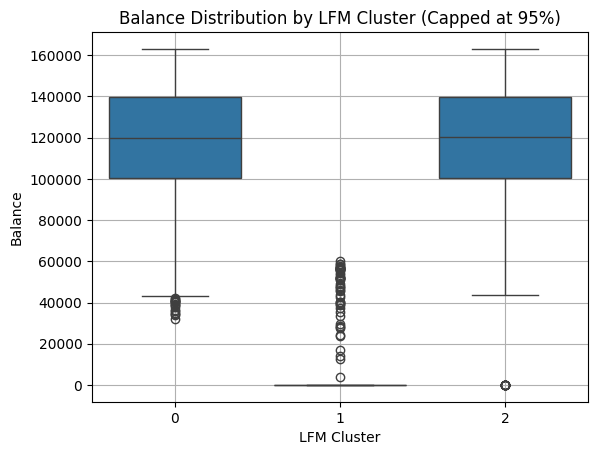

In [ ]:
# Create a copy for plotting only
df_plot = df.copy()

# Cap (Winsorize) balance at 95th percentile
cap_value = df_plot['balance'].quantile(0.95)
df_plot['balance'] = df_plot['balance'].clip(upper=cap_value)

# Now plot the capped balance
sns.boxplot(x='lfm_cluster', y='balance', data=df_plot)
plt.title("Balance Distribution by LFM Cluster (Capped at 95%)")
plt.xlabel("LFM Cluster")
plt.ylabel("Balance")
plt.grid(True)
plt.show()

### 🧠 **Soft Data Implementation – Behavioral Risk Scoring via Business Rules**

Soft data refers to **non-quantitative, rule-based behavioral insights** that aren't always captured by traditional numeric features, but still strongly **influence churn decisions**.

Inspired by the original research paper, we create **binary flags** based on customer psychology and banking behavior to compute a **`soft_score`**.

---

### 🧾 Defined Business Rules (Soft Factors):

We define 3 behavioral conditions that are known to **increase churn risk**:

---

In [66]:
# SOFT DATA IMPLEMENTATION 
# DEFININF SOFT DATA RULES 
# Rule 1: Low trust — if credit score is below 550
df['low_trust_flag'] = (df['credit_score'] < 550).astype(int)

# Rule 2: High dissatisfaction — if active_member is 0 and tenure < 3
df['dissatisfied_flag'] = ((df['active_member'] == 0) & (df['tenure'] < 3)).astype(int)

# Rule 3: High salary but low balance → possible risk of moving to another bank
df['flight_risk_flag'] = ((df['estimated_salary'] > df['balance']) & (df['balance'] < 10000)).astype(int)

# Combine into a soft score (simple sum or weighted logic)
df['soft_score'] = df[['low_trust_flag', 'dissatisfied_flag', 'flight_risk_flag']].sum(axis=1)

### 📊 **Analyzing Soft Scores and Their Impact on Churn**

After assigning a `soft_score` to each customer based on behavioral rules, we analyze:
- How many customers fall into each score bucket (0 to 3)
- How churn rates vary with increasing soft risk levels

---

In [ ]:
# ANALYZING SOFT SCORES 
# Check distribution
print(df['soft_score'].value_counts())

# Analyze churn rates based on soft score
print(df.groupby('soft_score')['churn'].value_counts(normalize=True).unstack())

soft_score
0    4566
1    4048
2     954
3      59
Name: count, dtype: int64
churn              0         1
soft_score                    
0           0.774639  0.225361
1           0.821887  0.178113
2           0.802935  0.197065
3           0.796610  0.203390


### ⚖️ **Normalizing LFM and Soft Scores for Fusion**

To combine **hard data clusters (LMF)** and **soft behavioral scores**, we must bring them to the same scale.  
We do this by normalizing both values to a 0–1 range using **min-max normalization**.

---

In [79]:
# Normalize LFM cluster (0–2 or 0–3) to 0–1
df['lfm_score_norm'] = df['lfm_cluster'] / df['lfm_cluster'].max()

# Normalize soft score (0–3) to 0–1
df['soft_score_norm'] = df['soft_score'] / df['soft_score'].max()

### 🔗 **Fusing Hard & Soft Scores into a Final Churn Risk Score**

After normalizing both **hard (LFM)** and **soft (behavioral)** scores, we combine them to produce a unified **`final_churn_risk_score`**.

---

#### 🧠 Why Fuse?

- **Hard data** (from clustering on numerical behavior) captures transactional patterns  
- **Soft data** (from behavioral rules) captures psychological & qualitative risk  
- Fusion provides a **holistic churn risk measure** that’s:
  - Actionable
  - Interpretable
  - Balanced between logic and behavior

---

#### ⚖️ Fusion Logic – Equal Weights

We assign **equal importance (50/50)** to both hard and soft contributions:

In [81]:
# Equal weight (50% hard, 50% soft)
df['final_churn_risk_score'] = 0.5 * df['lfm_score_norm'] + 0.5 * df['soft_score_norm']

### 🧩 **Classifying Customers into Churn Risk Buckets**

Once we compute the final `churn_risk_score` (a continuous value between 0 and 1), the next step is to **convert it into human-readable categories** for easier interpretation and decision-making.

---

#### 🧠 Why Categorize?

- Risk scores are powerful but hard to act on individually  
- Business teams prefer **segmenting customers** into **Low**, **Medium**, and **High** churn risk groups  
- This supports **targeted retention** and personalized strategies

---

#### 🧮 Risk Category Logic:

We define a simple rule-based categorization:


In [82]:
# Categorize Final Risk Score
def risk_category(score):
    if score < 0.33:
        return 'Low Risk'
    elif score < 0.66:
        return 'Medium Risk'
    else:
        return 'High Risk'

df['risk_category'] = df['final_churn_risk_score'].apply(risk_category)

---

### 🔍 Unexpected Insight: Low-Risk Customers Quietly Churning

Surprisingly, the churn rate among customers labeled as **"Low Risk"** was **25.2%**, slightly **higher than the "High Risk"** group at **23.6%**.

🧠 **Interpretation**:
- These customers had **low LFM scores** and no soft red flags
- Likely categorized as **"low value"** and **overlooked** by banks
- But in reality, they are quietly leaving — without complaint or escalation

---

💡 **Business Implication**:
Retention strategies often focus on high-value, high-risk customers.  
But ignoring low-engagement customers can lead to **silent churn** — a **missed opportunity** to build long-term value through proactive communication.

> 📌 Re-engaging the "quiet leavers" with low-cost, automated outreach might reduce churn in this overlooked segment.


In [ ]:
print(df['risk_category'].value_counts())
print(df.groupby('risk_category')['churn'].value_counts(normalize=True).unstack())

risk_category
Medium Risk    5050
Low Risk       3976
High Risk       601
Name: count, dtype: int64
churn                 0         1
risk_category                    
High Risk      0.763727  0.236273
Low Risk       0.747988  0.252012
Medium Risk    0.840396  0.159604


### 📊 **Visualizing Churn Distribution Across Risk Categories**

We use a **countplot** to visualize the number of churned (`churn = 1`) and non-churned (`churn = 0`) customers within each `risk_category`.

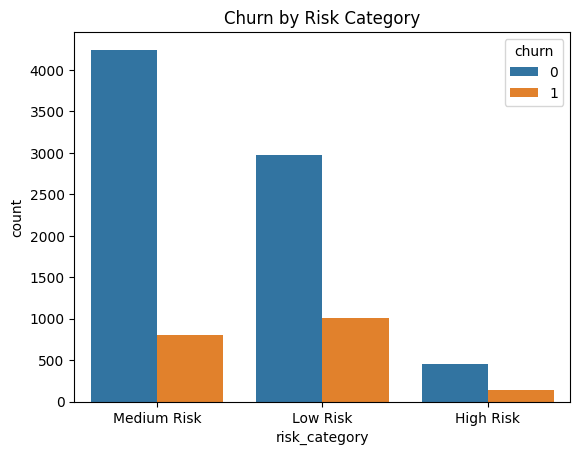

In [86]:
sns.countplot(x='risk_category', hue='churn', data=df)
plt.title("Churn by Risk Category")
plt.show()

### 💾 **Saving the Final Fused Dataset**

We export the enriched DataFrame containing all engineered features:

- LFM cluster (`lfm_cluster`)  
- Soft score (`soft_score`)  
- Normalized scores  
- Final churn risk score  
- Risk category

This allows us to reuse the processed data for analysis, deployment, or dashboarding.

In [87]:
df.to_csv('final_churn_fused.csv', index=False)

# 🧠 Final Project Summary – **Banking Customer Churn Prediction Using Hard + Soft Data Fusion**

This project presents a robust, end-to-end **churn prediction framework** for the banking industry by combining:

👉 **Machine Learning models (Hard Data)**  
👉 **Business Logic–driven insights (Soft Data)**

📄 *Inspired by the research paper:*  
**"Development of a Customer Churn Model for Banking Industry Based on Hard and Soft Data Fusion"**

---

## 📍 **Workflow Overview**

---

### 🔹 1. Data Exploration & Cleaning

- Loaded the **banking customer churn dataset**
- Handled:
  - **Missing values**
  - **Duplicate records**
  - **Outliers** in `age`, `credit_score`, etc. using **IQR**
- Performed **descriptive analysis** and correct **data typing**

---

### 🔹 2. Exploratory Data Analysis (EDA)

- Visualized patterns using:
  - `histplot`, `boxplot`, `heatmap`, `barplot`
- Discovered strong **churn indicators** like:
  - Inactive membership  
  - Low product usage  
  - High balance with low engagement  

---

### 🔹 3. Preprocessing

- **Encoded** categorical features (`gender`, `country`) using `LabelEncoder`
- Applied `train_test_split`
- Defined:
  - `X` = input features  
  - `y` = target (`churn`)  

---

### 🔹 4. Supervised Machine Learning Models (Hard Data)

Trained and evaluated several models:

- ✅ **Logistic Regression**  
- ✅ **Decision Tree** (CART, C4.5, C5.0 via XGBoost)  
- ✅ **Random Forest** (Basic & Hyperparameter-Tuned)  
- ✅ **Feature Selection** using Chi-Square (CHAID-style logic)

📊 **Evaluation Metrics:**
- Accuracy
- F1-Score
- ROC-AUC

🎯 **Best Model:**  
**Tuned Random Forest** via `RandomizedSearchCV` achieved **~86% AUC**

---

### 🔹 5. Hard Data Fusion – **Latent Modeling Features (LMF)**

- Selected behavioral indicators:  
  `tenure`, `products_number`, `balance`

- Applied:
  - `StandardScaler`  
  - **K-Means clustering** (`k=3`)  
  → Created `lfm_cluster`  

---

### 🔹 6. Soft Data – **Business Rule Modeling**

Defined 3 behavioral churn flags:

1. `low_trust_flag`: **credit score < 550**  
2. `dissatisfied_flag`: **inactive & tenure < 3**  
3. `flight_risk_flag`: **high salary but low balance**

🎯 These were summed to form a **`soft_score`** (range: **0–3**)

---

### 🔹 7. Fusion: Combining Hard + Soft Scores

- **Normalized** both `lfm_cluster` and `soft_score` to 0–1 range
- Calculated final churn risk score:

```python
df['final_churn_risk_score'] = 0.5 * lfm_score_norm + 0.5 * soft_score_norm

--- 

### 🔹 8. Risk Segmentation

Segmented customers based on final churn risk score:

| Risk Category | Score Range           | Icon |
|---------------|------------------------|------|
| ✅ Low Risk    | `< 0.33`                | ✅   |
| ⚠️ Medium Risk | `0.33 ≤ score < 0.66`   | ⚠️   |
| ❗ High Risk   | `≥ 0.66`                | ❗   |

```python
# Categorization Function
def categorize_risk(score):
    if score < 0.33:
        return 'Low Risk'
    elif score < 0.66:
        return 'Medium Risk'
    else:
        return 'High Risk'

df['risk_category'] = df['final_churn_risk_score'].apply(categorize_risk)

### 🔍 9. Final Insights from Risk Segmentation

📊 **Analyzed churn rates by risk group**

💡 **Surprising Insight**:
- "Low Risk" group showed **higher churn (25.2%)** than the "High Risk" group (23.6%)
- Indicates **silent churn**: low-value, low-engagement customers quietly leaving
- These customers are **often ignored by banks** but offer **high retention potential**

---

### 🎨 10. Visualizations

- 🔳 **Boxplot**: Visualized `balance` distribution across LFM clusters
- 📊 **Countplot**: Displayed churn distribution across `risk_category`
- 🧊 *(Optional)*: Interactive 3D cluster visualization using **Plotly**

📤 **Exported enriched dataset** for future analysis:

```python
df.to_csv('final_churn_fused.csv', index=False) 

### 🧑‍💻 11. Streamlit Web App – **Live Churn Prediction**

Developed a **Streamlit application** to enable real-time customer churn risk prediction.

🚀 **App Features:**
- User-friendly form to input **new customer details**
- Real-time churn prediction using the trained model
- Displays:
  - ✅ `final_churn_risk_score`
  - ✅ `lfm_cluster`
  - ✅ `soft_score`
  - ✅ `risk_category`

🎨 **UI Enhancements:**
- Custom dark mode theme via `.streamlit/config.toml`
- Sidebar branding logo
- Luxury color palette for a premium look

---

## ✅ Key Takeaways

- ✅ Combined **machine learning** with **behavioral business rules**
- ✅ Delivered predictions that are **accurate**, **interpretable**, and **strategic**
- ✅ Modeled both **latent behavior** and **explicit features**
- ✅ Final product is **business-ready**, **visually intuitive**, and **deployable**

---

## 📁 Final Deliverables

| File                          | Description                                |
|------------------------------|--------------------------------------------|
| `Banking_Customer_Churn_Project.ipynb` | Full model pipeline from data to deployment |
| `final_churn_fused.csv`      | Final dataset with engineered features      |
| `app.py`                     | Streamlit app for live churn prediction     |
| `.streamlit/config.toml`     | Theme configuration (dark mode + branding)  |
